In [11]:
import jax.numpy as jnp
from jax import grad, jit, vmap, jacfwd, jacrev
from jax import random
import jax.scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import networkx as nx
import pandas as pd
from tqdm.auto import tqdm, trange
from scipy.sparse import csc_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
import claude as cl
from claude import observables as obs
from claude import constraints as const

In [13]:
from importlib import reload
reload(obs)
reload(cl)
reload(const)

<module 'claude.constraints' from '/Users/reema/Postdoc/Progetti/MAXENT/claude/claude/constraints.py'>

# Initialize

In [4]:

N = 1000
ba = nx.barabasi_albert_graph(N,30)
gn = nx.scale_free_graph(1000)
bp = nx.bipartite.random_graph(1000,400,0.1)
ba_adj = np.asarray(nx.adj_matrix(ba).todense())
gn_adj = np.sign(np.asarray(nx.adj_matrix(gn).todense()))
bp_adj = np.asarray(nx.adj_matrix(bp).todense())[:1000,1000:]
d = np.array(ba_adj.sum(axis=0)).flatten()
dinv = 1/d

din = np.array(gn_adj.sum(axis=0)).flatten()
dout = np.array(gn_adj.sum(axis=1)).flatten()

bp_din = np.array(bp_adj.sum(axis=0)).flatten()
bp_dout = np.array(bp_adj.sum(axis=1)).flatten()

In [5]:
def plot_adj(adj, vmax=1):
    plt.imshow(adj,cmap=matplotlib.cm.get_cmap('gray_r'),vmin=0,vmax=vmax)
    plt.colorbar()

# Connectivity

## Total connectivity

In [17]:
m = cl.GraphEnsemble(1000)
m.fit([const.Connectivity(198400)], opt_kwargs={'nit':30,'fatol':1e-2,'disp':True})

0:  |F(x)| = 9818.44; step 1
1:  |F(x)| = 916.362; step 1
2:  |F(x)| = 51.3878; step 1
3:  |F(x)| = 1.87955; step 1
4:  |F(x)| = 0.0516455; step 1
5:  |F(x)| = 0.00113519; step 1
6:  |F(x)| = 1.71247e-06; step 1
7:  |F(x)| = 2.03727e-10; step 1
8:  |F(x)| = 1.16415e-10; step 1
9:  |F(x)| = 2.91038e-11; step 0.5


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.2446e-19): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=3.34132e-24): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=3.1343e-22): result may not be accurate.
  gamma = solve(self.a, df_f)


10:  |F(x)| = 2.91038e-11; step 1
11:  |F(x)| = 1.16415e-10; step 1
12:  |F(x)| = 2.91038e-11; step 1
13:  |F(x)| = 2.91038e-11; step 1
14:  |F(x)| = 1.16415e-10; step 1
15:  |F(x)| = 2.91038e-11; step 1
16:  |F(x)| = 1.16415e-10; step 1
17:  |F(x)| = 2.91038e-11; step 1
18:  |F(x)| = 2.91038e-11; step 1
19:  |F(x)| = 1.16415e-10; step 1
20:  |F(x)| = 1.16415e-10; step 1
21:  |F(x)| = 2.91038e-11; step 0.5
22:  |F(x)| = 2.91038e-11; step 1
23:  |F(x)| = 2.91038e-11; step 1
24:  |F(x)| = 1.16415e-10; step 1
25:  |F(x)| = 2.91038e-11; step 1
26:  |F(x)| = 1.16415e-10; step 1
27:  |F(x)| = 2.91038e-11; step 1
28:  |F(x)| = 2.91038e-11; step 1
29:  |F(x)| = 1.16415e-10; step 1


In [18]:
o = obs.Connectivity
smpl = [np.triu(m.sample(),1).sum() for i in trange(100)]
mean = m.predict_mean(o)
std = m.predict_std(o)

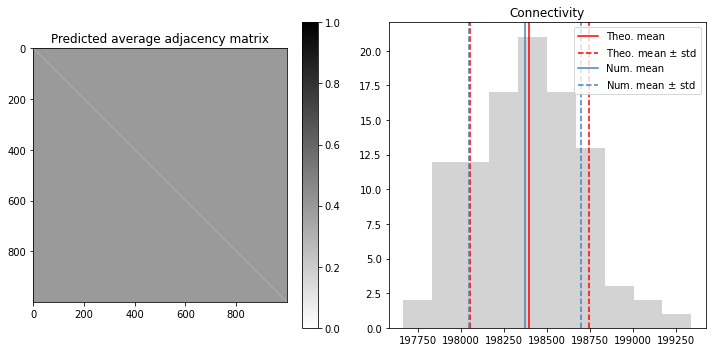

In [19]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plot_adj(m.adj_matrix)
plt.title('Predicted average adjacency matrix',fontsize=12)
plt.subplot(1,2,2)
plt.hist(smpl,color='lightgray')
plt.axvline(mean,color='red', label='Theo. mean')
plt.axvline(mean-std,color='red',linestyle='dashed', label='Theo. mean $\pm$ std')
plt.axvline(mean+std,color='red',linestyle='dashed')
plt.axvline(np.mean(smpl),color='steelblue', label='Num. mean')
plt.axvline(np.mean(smpl)-np.std(smpl),color='steelblue',linestyle='dashed', label='Num. mean $\pm$ std')
plt.axvline(np.mean(smpl)+np.std(smpl),color='steelblue',linestyle='dashed')
plt.title('Connectivity',fontsize=12)
plt.legend()
plt.tight_layout()

## Subgraph connectivity

In [14]:
nodeset1 = np.arange(300)

In [15]:
m = cl.GraphEnsemble(1000)
m.fit([const.Connectivity(34300, nodeset1=nodeset1)], opt_kwargs={'nit':30,'fatol':1e-2,'disp':True})

0:  |F(x)| = 17367.3; step 1
1:  |F(x)| = 813.498; step 1
2:  |F(x)| = 176.859; step 1
3:  |F(x)| = 21.4276; step 1
4:  |F(x)| = 1.83365; step 1
5:  |F(x)| = 0.124335; step 1
6:  |F(x)| = 0.00415162; step 1
7:  |F(x)| = 3.48171e-05; step 1
8:  |F(x)| = 5.11573e-08; step 1
9:  |F(x)| = 2.91038e-11; step 1
10:  |F(x)| = 1.45519e-11; step 1
11:  |F(x)| = 7.27596e-12; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.04439e-19): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.59285e-23): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=2.99501e-21): result may not be accurate.
  gamma = solve(self.a, df_f)


12:  |F(x)| = 7.27596e-12; step 1
13:  |F(x)| = 0; step 1


In [18]:
o = obs.Connectivity(nodeset1=nodeset1)
smpl = [np.triu(m.sample()[:300,:300]).sum() for i in trange(100)]
mean = m.predict_mean(o)
std = m.predict_std(o)

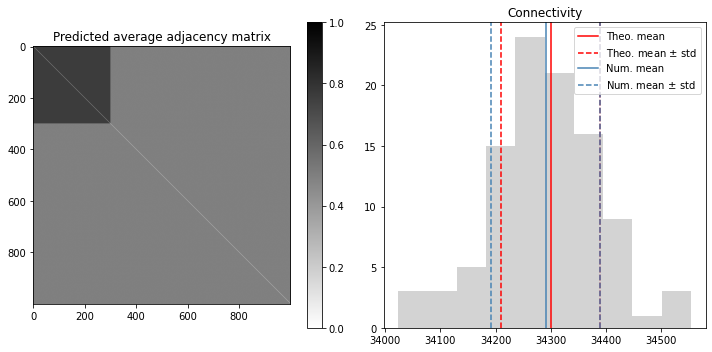

In [19]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plot_adj(m.adj_matrix)
plt.title('Predicted average adjacency matrix',fontsize=12)
plt.subplot(1,2,2)
plt.hist(smpl,color='lightgray')
plt.axvline(mean,color='red', label='Theo. mean')
plt.axvline(mean-std,color='red',linestyle='dashed', label='Theo. mean $\pm$ std')
plt.axvline(mean+std,color='red',linestyle='dashed')
plt.axvline(np.mean(smpl),color='steelblue', label='Num. mean')
plt.axvline(np.mean(smpl)-np.std(smpl),color='steelblue',linestyle='dashed', label='Num. mean $\pm$ std')
plt.axvline(np.mean(smpl)+np.std(smpl),color='steelblue',linestyle='dashed')
plt.legend()
plt.title('Connectivity',fontsize=12)
plt.tight_layout()

## Connectivity between 2 groups of nodes

In [21]:
nodeset1 = np.arange(300)
nodeset2 = np.arange(450,700)

In [25]:
m = cl.GraphEnsemble(1000)
m.fit([const.Connectivity(300, nodeset1=nodeset1, nodeset2=nodeset2)], opt_kwargs={'nit':30,'fatol':1e-2,'disp':True})

0:  |F(x)| = 13381.9; step 1
1:  |F(x)| = 5227.98; step 1
2:  |F(x)| = 3049.27; step 1
3:  |F(x)| = 1860.17; step 1
4:  |F(x)| = 1181.9; step 1
5:  |F(x)| = 770.443; step 1
6:  |F(x)| = 474.442; step 1
7:  |F(x)| = 278.219; step 1
8:  |F(x)| = 154.277; step 1
9:  |F(x)| = 78.5543; step 1
10:  |F(x)| = 35.1165; step 1
11:  |F(x)| = 12.8979; step 1
12:  |F(x)| = 3.55203; step 1
13:  |F(x)| = 0.653723; step 1
14:  |F(x)| = 0.0700334; step 1
15:  |F(x)| = 0.00371426; step 1
16:  |F(x)| = 8.04156e-05; step 1
17:  |F(x)| = 5.60578e-07; step 1
18:  |F(x)| = 9.36438e-10; step 1
19:  |F(x)| = 2.27374e-13; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.02408e-16): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=2.35769e-20): result may not be accurate.
  gamma = solve(self.a, df_f)


20:  |F(x)| = 2.27374e-13; step 1
21:  |F(x)| = 2.27374e-13; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.91476e-24): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=3.21968e-21): result may not be accurate.
  gamma = solve(self.a, df_f)


22:  |F(x)| = 2.27374e-13; step 1
23:  |F(x)| = 2.27374e-13; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=5.49206e-17): result may not be accurate.
  gamma = solve(self.a, df_f)


24:  |F(x)| = 2.27374e-13; step 1
25:  |F(x)| = 2.27374e-13; step 1
26:  |F(x)| = 2.27374e-13; step 1
27:  |F(x)| = 2.27374e-13; step 1
28:  |F(x)| = 2.27374e-13; step 1
29:  |F(x)| = 2.27374e-13; step 1


In [29]:
o = obs.Connectivity(nodeset1=nodeset1,nodeset2=nodeset2)
smpl = [np.triu(m.sample())[nodeset1[:,None],nodeset2].sum() for i in trange(100)]
mean = m.predict_mean(o)
std = m.predict_std(o)

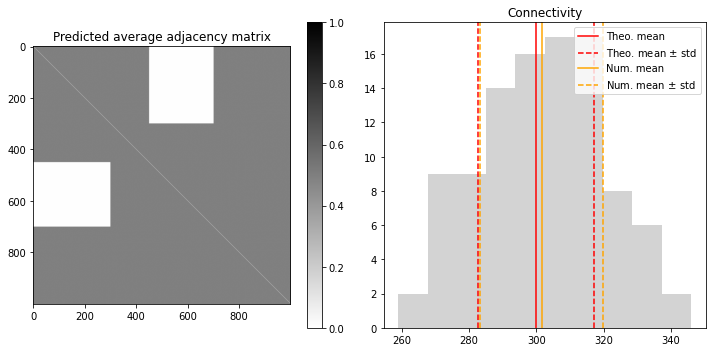

In [30]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plot_adj(m.adj_matrix)
plt.title('Predicted average adjacency matrix',fontsize=12)
plt.subplot(1,2,2)
plt.hist(smpl,color='lightgray')
plt.axvline(mean,color='red', label='Theo. mean')
plt.axvline(mean-std,color='red',linestyle='dashed', label='Theo. mean $\pm$ std')
plt.axvline(mean+std,color='red',linestyle='dashed')
plt.axvline(np.mean(smpl),color='orange', label='Num. mean')
plt.axvline(np.mean(smpl)-np.std(smpl),color='orange',linestyle='dashed', label='Num. mean $\pm$ std')
plt.axvline(np.mean(smpl)+np.std(smpl),color='orange',linestyle='dashed')
plt.title('Connectivity',fontsize=12)
plt.legend()
plt.tight_layout()

# Fixed degree sequence

### Full degree sequence

In [7]:
m = cl.GraphEnsemble(1000)
m.fit([const.DegreeSequence(d)], opt_kwargs={'nit':100,'fatol':1e-2,'disp':True})

0:  |F(x)| = 98.367; step 1
1:  |F(x)| = 39.4228; step 1
2:  |F(x)| = 45.7638; step 1
3:  |F(x)| = 50.2524; step 1
4:  |F(x)| = 16.7903; step 0.307024
5:  |F(x)| = 26.031; step 1
6:  |F(x)| = 4.06489; step 0.405699
7:  |F(x)| = 2.67241; step 1
8:  |F(x)| = 2.04985; step 1
9:  |F(x)| = 1.30526; step 1
10:  |F(x)| = 0.908004; step 1
11:  |F(x)| = 0.698844; step 1
12:  |F(x)| = 0.504142; step 1
13:  |F(x)| = 0.331493; step 1
14:  |F(x)| = 0.267635; step 1
15:  |F(x)| = 0.178807; step 1
16:  |F(x)| = 0.123712; step 1
17:  |F(x)| = 0.0813704; step 1
18:  |F(x)| = 0.0401193; step 1
19:  |F(x)| = 0.0234994; step 1
20:  |F(x)| = 0.009735; step 1
21:  |F(x)| = 0.0032019; step 1
22:  |F(x)| = 0.000914306; step 1
23:  |F(x)| = 0.00185999; step 1
24:  |F(x)| = 0.00215473; step 1
25:  |F(x)| = 0.00208539; step 1
26:  |F(x)| = 0.0018583; step 1
27:  |F(x)| = 0.00161616; step 1
28:  |F(x)| = 0.00126534; step 1
29:  |F(x)| = 0.00101437; step 1
30:  |F(x)| = 0.000705365; step 1
31:  |F(x)| = 0.00042633

In [8]:
o = obs.DegreeSequence
smpl = np.asarray([m.sample().sum(axis=1) for i in trange(100)])
theo_mean = m.predict_mean(o)
theo_std = m.predict_std(o)
num_mean = smpl.mean(axis=0)
num_std = smpl.std(axis=0)

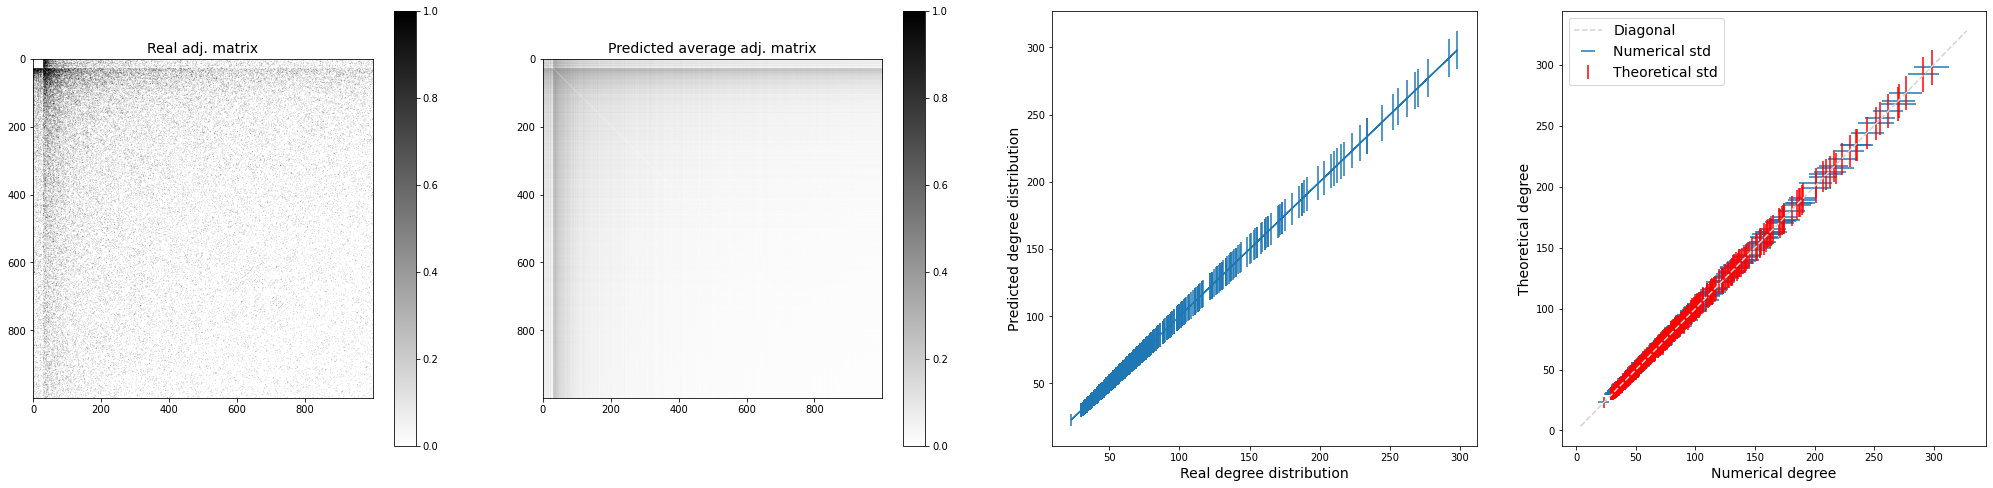

In [9]:
plt.figure(figsize=[35,8])
plt.subplot(1,4,1)
plot_adj(ba_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,4,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adj. matrix',fontsize=14)
plt.subplot(1,4,3)
plt.errorbar(d, theo_mean,yerr=theo_std)
plt.xlabel('Original degree distribution',fontsize=14)
plt.ylabel('Predicted degree distribution',fontsize=14)
plt.subplot(1,4,4)
plt.errorbar(num_mean,theo_mean,xerr=num_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_mean,theo_mean,yerr=theo_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)

### Partial degree sequence

In [11]:
nodeset=np.arange(500)

In [12]:
m = cl.GraphEnsemble(1000)
m.fit([const.DegreeSequence(d[nodeset], nodeset=nodeset)], opt_kwargs={'nit':30,'fatol':1e-2,'disp':True})

0:  |F(x)| = 99.5757; step 1
1:  |F(x)| = 51.6868; step 1
2:  |F(x)| = 25.4898; step 1
3:  |F(x)| = 39.2356; step 1
4:  |F(x)| = 15.0865; step 1
5:  |F(x)| = 6.62177; step 1
6:  |F(x)| = 6.80633; step 1
7:  |F(x)| = 4.53849; step 1
8:  |F(x)| = 3.02309; step 1
9:  |F(x)| = 2.67885; step 1
10:  |F(x)| = 2.20329; step 1
11:  |F(x)| = 1.49209; step 1
12:  |F(x)| = 0.879468; step 1
13:  |F(x)| = 0.54694; step 1
14:  |F(x)| = 0.376981; step 1
15:  |F(x)| = 0.194804; step 1
16:  |F(x)| = 0.074654; step 1
17:  |F(x)| = 0.032615; step 1
18:  |F(x)| = 0.0309505; step 1
19:  |F(x)| = 0.024184; step 1
20:  |F(x)| = 0.0150589; step 1
21:  |F(x)| = 0.0116442; step 1
22:  |F(x)| = 0.00945302; step 1
23:  |F(x)| = 0.00497393; step 1
24:  |F(x)| = 0.00341961; step 1
25:  |F(x)| = 0.00285345; step 1
26:  |F(x)| = 0.00220544; step 1
27:  |F(x)| = 0.00138778; step 1
28:  |F(x)| = 0.000822251; step 1
29:  |F(x)| = 0.000432845; step 1


In [13]:
o = obs.DegreeSequence
smpl = np.asarray([m.sample().sum(axis=1) for i in trange(100)])
theo_mean = m.predict_mean(o)
theo_std = m.predict_std(o)
num_mean = smpl.mean(axis=0)
num_std = smpl.std(axis=0)

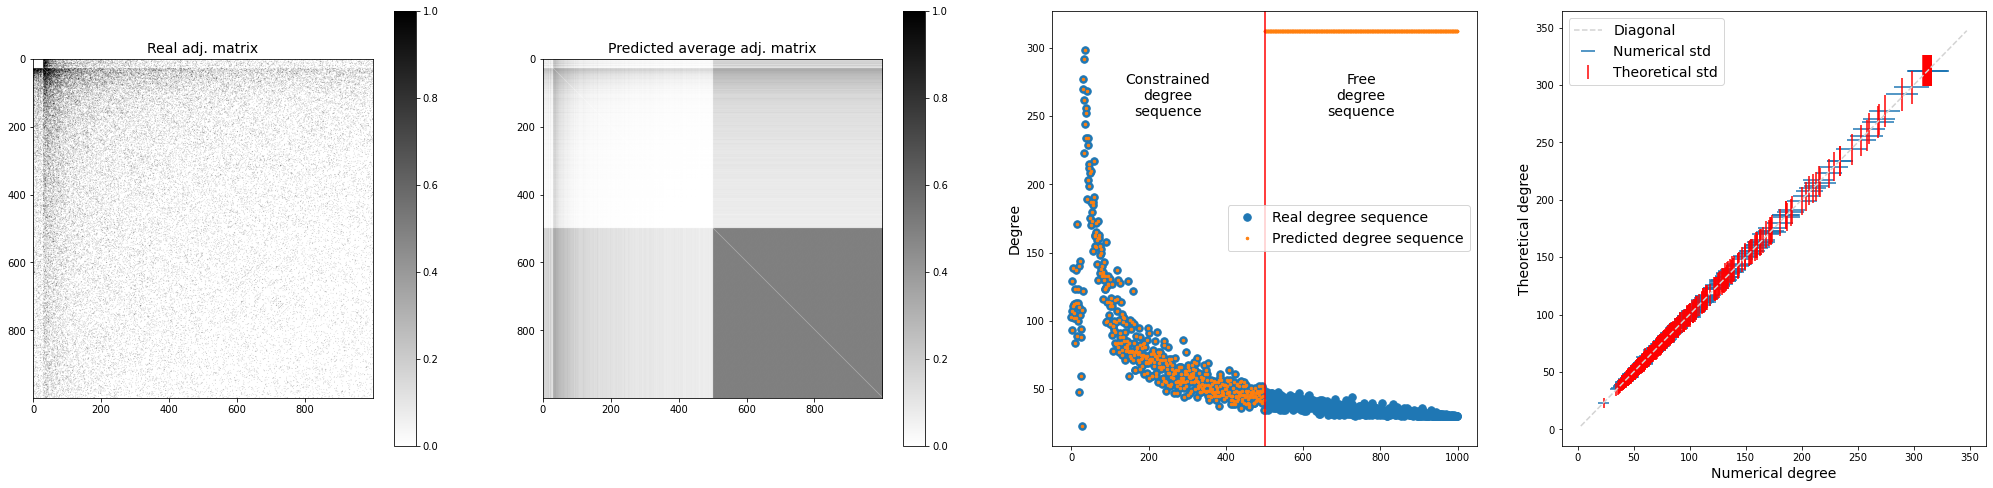

In [15]:
plt.figure(figsize=[35,8])
plt.subplot(1,4,1)
plot_adj(ba_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,4,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adj. matrix',fontsize=14)
plt.subplot(1,4,3)
plt.plot(d, '.', markersize=15,label='Original degree sequence')
plt.plot(theo_mean,'.',markersize=5,label='Predicted degree sequence')
plt.axvline(len(nodeset),color='red')
plt.text(len(nodeset)/2,250,'Constrained\ndegree\nsequence',fontsize=14,ha='center')
plt.text(len(nodeset)*3/2,250,'Free\ndegree\nsequence',fontsize=14,ha='center')
plt.ylabel('Degree',fontsize=14)
plt.legend(fontsize=14)
plt.subplot(1,4,4)
plt.errorbar(num_mean,theo_mean,xerr=num_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_mean,theo_mean,yerr=theo_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)

### Degree sequence in subgraph

In [36]:
nodeset = np.arange(200)
bg_nodeset = np.arange(500)
ba_partial_d = ba_adj[nodeset[:,None],bg_nodeset].sum(axis=1)

In [37]:
m = cl.GraphEnsemble(1000)
m.fit([const.DegreeSequence(ba_partial_d, nodeset=nodeset, subgraph_nodeset=bg_nodeset)], opt_kwargs={'nit':100,'fatol':1e-2,'disp':True})

0:  |F(x)| = 35.4211; step 1
1:  |F(x)| = 22.7166; step 1
2:  |F(x)| = 15.455; step 1
3:  |F(x)| = 9.13244; step 1
4:  |F(x)| = 5.44492; step 1
5:  |F(x)| = 3.43512; step 1
6:  |F(x)| = 1.74273; step 1
7:  |F(x)| = 0.48635; step 1
8:  |F(x)| = 0.322453; step 1
9:  |F(x)| = 0.150866; step 1
10:  |F(x)| = 0.0507356; step 1
11:  |F(x)| = 0.0187879; step 1
12:  |F(x)| = 0.00366858; step 1
13:  |F(x)| = 0.00171449; step 1
14:  |F(x)| = 0.00100524; step 1
15:  |F(x)| = 0.000707857; step 1
16:  |F(x)| = 0.000291575; step 1
17:  |F(x)| = 0.000168473; step 1
18:  |F(x)| = 0.000111881; step 1
19:  |F(x)| = 5.93041e-05; step 1
20:  |F(x)| = 1.89493e-05; step 1
21:  |F(x)| = 6.9073e-06; step 1
22:  |F(x)| = 2.70596e-06; step 1
23:  |F(x)| = 1.22721e-06; step 1
24:  |F(x)| = 1.17629e-06; step 1
25:  |F(x)| = 7.38768e-07; step 1
26:  |F(x)| = 3.31074e-07; step 1
27:  |F(x)| = 1.95713e-07; step 1
28:  |F(x)| = 1.11434e-07; step 1
29:  |F(x)| = 4.91927e-08; step 1
30:  |F(x)| = 1.94982e-08; step 1
31:

In [33]:
o = obs.DegreeSequence(nodeset=nodeset,subgraph_nodeset=bg_nodeset)
smpl = np.asarray([m.sample()[nodeset[:,None],bg_nodeset].sum(axis=1) for i in trange(100)])
theo_mean = m.predict_mean(o)
theo_std = m.predict_std(o)
num_mean = smpl.mean(axis=0)
num_std = smpl.std(axis=0)

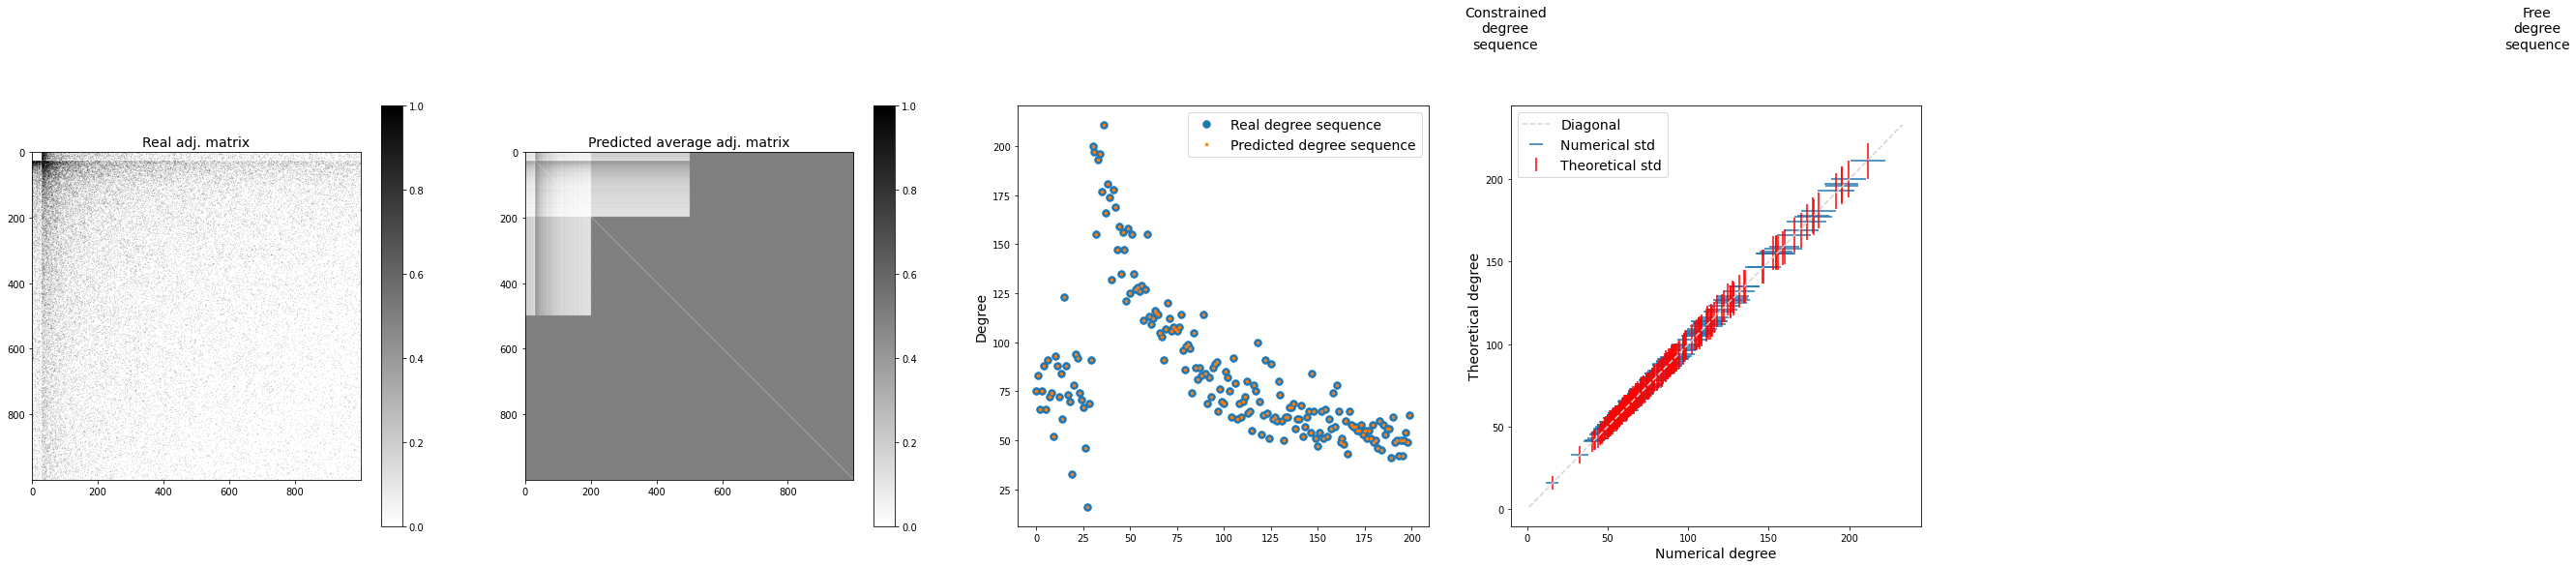

In [38]:
plt.figure(figsize=[35,8])
plt.subplot(1,4,1)
plot_adj(ba_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,4,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adj. matrix',fontsize=14)
plt.subplot(1,4,3)
plt.plot(ba_partial_d, '.', markersize=15,label='Original degree sequence')
plt.plot(theo_mean,'.',markersize=5,label='Predicted degree sequence')
#plt.axvline(200,color='red')
plt.text(250,250,'Constrained\ndegree\nsequence',fontsize=14,ha='center')
plt.text(800,250,'Free\ndegree\nsequence',fontsize=14,ha='center')
plt.ylabel('Degree',fontsize=14)
plt.legend(fontsize=14)
plt.subplot(1,4,4)
plt.errorbar(num_mean,theo_mean,xerr=num_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_mean,theo_mean,yerr=theo_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)

# Fixing edges

In [39]:
edges1 = np.asarray(np.meshgrid(np.arange(100),np.arange(100,200))).T.reshape(-1,2)
edges0 = np.asarray(np.meshgrid(np.arange(100,200),np.arange(300,400))).T.reshape(-1,2)

In [40]:
m = cl.GraphEnsemble(1000)
m.fix_edges_value(np.concatenate([edges0,edges1],axis=0), np.concatenate([np.zeros(len(edges0)),np.ones(len(edges1))]))
m.fit([const.Connectivity(150000)], opt_kwargs={'nit':30,'fatol':1e-2,'disp':True})

0:  |F(x)| = 9328.35; step 0.0362154
1:  |F(x)| = 248.751; step 1
2:  |F(x)| = 8.53801; step 1
3:  |F(x)| = 0.190824; step 1
4:  |F(x)| = 0.00320217; step 1
5:  |F(x)| = 4.2987e-05; step 1
6:  |F(x)| = 1.72673e-07; step 1
7:  |F(x)| = 8.73115e-11; step 1
8:  |F(x)| = 2.91038e-11; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=1.3903e-17): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=3.38767e-18): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=4.78292e-20): result may not be accurate.
  gamma = solve(self.a, df_f)
/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=4.42378e-23): result may not be accurate.
  gamma = solve(self.a, df_f)


9:  |F(x)| = 2.91038e-11; step 1


/Users/reema/anaconda2/envs/claude/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1132: LinAlgWarning: Ill-conditioned matrix (rcond=3.52703e-20): result may not be accurate.
  gamma = solve(self.a, df_f)


10:  |F(x)| = 2.91038e-11; step 1
11:  |F(x)| = 2.91038e-11; step 1
12:  |F(x)| = 2.91038e-11; step 1
13:  |F(x)| = 2.91038e-11; step 1
14:  |F(x)| = 2.91038e-11; step 1
15:  |F(x)| = 2.91038e-11; step 1
16:  |F(x)| = 2.91038e-11; step 1
17:  |F(x)| = 2.91038e-11; step 1
18:  |F(x)| = 2.91038e-11; step 1
19:  |F(x)| = 2.91038e-11; step 1
20:  |F(x)| = 2.91038e-11; step 1
21:  |F(x)| = 2.91038e-11; step 1
22:  |F(x)| = 2.91038e-11; step 1
23:  |F(x)| = 2.91038e-11; step 1
24:  |F(x)| = 2.91038e-11; step 1
25:  |F(x)| = 2.91038e-11; step 1
26:  |F(x)| = 2.91038e-11; step 1
27:  |F(x)| = 2.91038e-11; step 1
28:  |F(x)| = 2.91038e-11; step 1
29:  |F(x)| = 2.91038e-11; step 1


Text(0.5, 1.0, 'Predicted average adj. matrix')

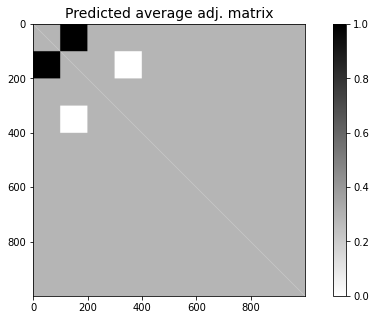

In [43]:
plt.figure(figsize=[10,5])
plot_adj(m.adj_matrix)
plt.title('Predicted average adj. matrix',fontsize=14)

# Joining constraints

In [40]:
nodeset1 = np.arange(200)
nodeset2 = np.arange(300,400)

In [41]:
m = cl.GraphEnsemble(1000)
m.fit([const.DegreeSequence(d),const.Connectivity(500, nodeset1=nodeset1, nodeset2=nodeset2)], opt_kwargs={'nit':100,'fatol':1e-2,'disp':True})

0:  |F(x)| = 484.762; step 1
1:  |F(x)| = 445.853; step 1
2:  |F(x)| = 753.316; step 1
3:  |F(x)| = 504.68; step 1
4:  |F(x)| = 24.0621; step 1
5:  |F(x)| = 26.4843; step 0.00258233
6:  |F(x)| = 42.3299; step 0.0405293
7:  |F(x)| = 77.0412; step 0.169508
8:  |F(x)| = 110.245; step 1
9:  |F(x)| = 74.0659; step 1
10:  |F(x)| = 4.64272; step 1
11:  |F(x)| = 2.29362; step 1
12:  |F(x)| = 0.395661; step 1
13:  |F(x)| = 0.509884; step 1
14:  |F(x)| = 0.2344; step 1
15:  |F(x)| = 0.12257; step 1
16:  |F(x)| = 0.0478206; step 1
17:  |F(x)| = 0.0240193; step 1
18:  |F(x)| = 0.0152538; step 1
19:  |F(x)| = 0.0105505; step 1
20:  |F(x)| = 0.00423293; step 1
21:  |F(x)| = 0.00202692; step 1
22:  |F(x)| = 0.00160411; step 1
23:  |F(x)| = 0.00138057; step 1
24:  |F(x)| = 0.000984344; step 1
25:  |F(x)| = 0.000553365; step 1
26:  |F(x)| = 0.000284298; step 1
27:  |F(x)| = 0.000145264; step 1
28:  |F(x)| = 0.00014335; step 1
29:  |F(x)| = 0.000133749; step 1
30:  |F(x)| = 8.45392e-05; step 1
31:  |F(x

In [42]:
o_d = obs.DegreeSequence
theo_mean_d = m.predict_mean(o_d)
theo_std_d = m.predict_std(o_d)

o_c = obs.Connectivity(nodeset1=nodeset1,nodeset2=nodeset2)
smpl = [np.triu(m.sample())[nodeset1[:,None],nodeset2].sum() for i in trange(100)]
theo_mean_c = m.predict_mean(o_c)
theo_std_c = m.predict_std(o_c)

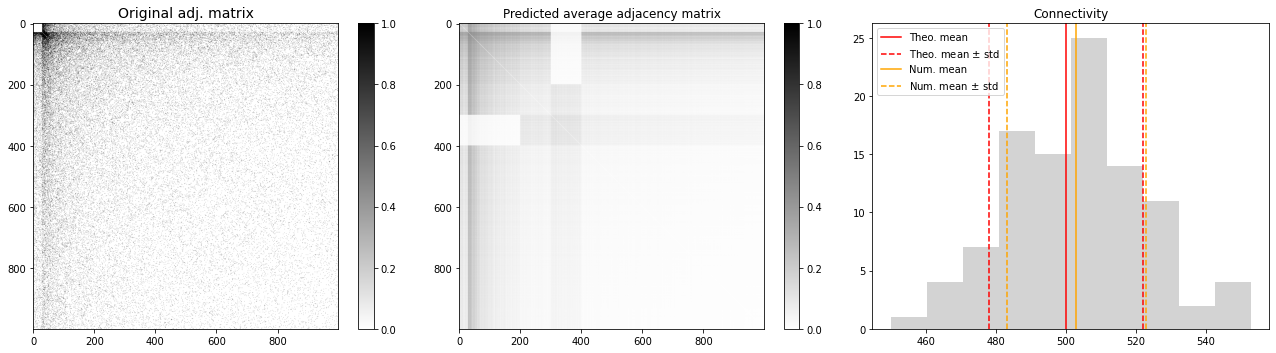

In [43]:
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plot_adj(ba_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,3,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adjacency matrix',fontsize=12)
plt.subplot(1,3,3)
plt.hist(smpl,color='lightgray')
plt.axvline(theo_mean_c,color='red', label='Theo. mean')
plt.axvline(theo_mean_c-theo_std_c,color='red',linestyle='dashed', label='Theo. mean $\pm$ std')
plt.axvline(theo_mean_c+theo_std_c,color='red',linestyle='dashed')
plt.axvline(np.mean(smpl),color='orange', label='Num. mean')
plt.axvline(np.mean(smpl)-np.std(smpl),color='orange',linestyle='dashed', label='Num. mean $\pm$ std')
plt.axvline(np.mean(smpl)+np.std(smpl),color='orange',linestyle='dashed')
plt.title('Connectivity',fontsize=12)
plt.legend()
plt.tight_layout()

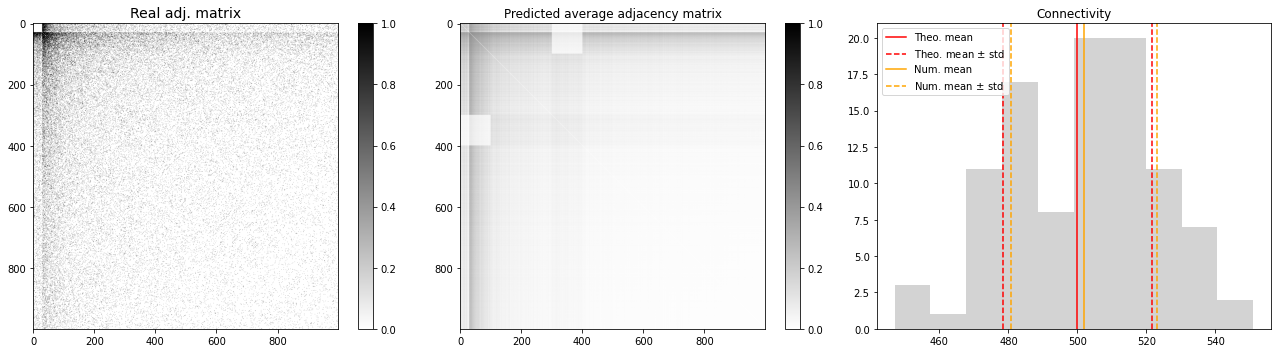

In [82]:
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
plot_adj(ba_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,3,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adjacency matrix',fontsize=12)
plt.subplot(1,3,3)
plt.hist(smpl,color='lightgray')
plt.axvline(theo_mean_c,color='red', label='Theo. mean')
plt.axvline(theo_mean_c-theo_std_c,color='red',linestyle='dashed', label='Theo. mean $\pm$ std')
plt.axvline(theo_mean_c+theo_std_c,color='red',linestyle='dashed')
plt.axvline(np.mean(smpl),color='orange', label='Num. mean')
plt.axvline(np.mean(smpl)-np.std(smpl),color='orange',linestyle='dashed', label='Num. mean $\pm$ std')
plt.axvline(np.mean(smpl)+np.std(smpl),color='orange',linestyle='dashed')
plt.title('Connectivity',fontsize=12)
plt.legend()
plt.tight_layout()

# Directed networks

In [11]:
m = cl.GraphEnsemble(1000, directed=True)
m.fit([const.OutDegreeSequence(dout),const.InDegreeSequence(din)], opt_kwargs={'nit':150,'fatol':1e-2,'disp':True})

0:  |F(x)| = 211.844; step 1
1:  |F(x)| = 68.1485; step 1
2:  |F(x)| = 53.6929; step 1
3:  |F(x)| = 56.799; step 1
4:  |F(x)| = 97.8181; step 1
5:  |F(x)| = 82.3915; step 1
6:  |F(x)| = 15.0368; step 1
7:  |F(x)| = 16.2578; step 1
8:  |F(x)| = 15.3909; step 1
9:  |F(x)| = 12.7736; step 1
10:  |F(x)| = 14.7386; step 1
11:  |F(x)| = 6.19223; step 1
12:  |F(x)| = 7.42645; step 1
13:  |F(x)| = 8.96566; step 1
14:  |F(x)| = 5.22568; step 1
15:  |F(x)| = 5.10532; step 1
16:  |F(x)| = 4.26572; step 1
17:  |F(x)| = 8.19262; step 1
18:  |F(x)| = 7.73923; step 1
19:  |F(x)| = 5.86838; step 1
20:  |F(x)| = 2.93649; step 1
21:  |F(x)| = 2.10983; step 0.308315
22:  |F(x)| = 3.15867; step 1
23:  |F(x)| = 3.70951; step 1
24:  |F(x)| = 4.04735; step 1
25:  |F(x)| = 2.3254; step 1
26:  |F(x)| = 1.81001; step 1
27:  |F(x)| = 2.22915; step 1
28:  |F(x)| = 2.32368; step 1
29:  |F(x)| = 1.47816; step 1
30:  |F(x)| = 1.5548; step 1
31:  |F(x)| = 1.27705; step 1
32:  |F(x)| = 1.33144; step 1
33:  |F(x)| = 1.

In [12]:
o_out = obs.OutDegreeSequence
smpl = np.asarray([m.sample().sum(axis=1) for i in trange(100)])
theo_dout_mean = m.predict_mean(o_out)
theo_dout_std = m.predict_std(o_out)
num_dout_mean = smpl.mean(axis=0)
num_dout_std = smpl.std(axis=0)

o_in = obs.InDegreeSequence
smpl = np.asarray([m.sample().sum(axis=0) for i in trange(100)])
theo_din_mean = m.predict_mean(o_in)
theo_din_std = m.predict_std(o_in)
num_din_mean = smpl.mean(axis=0)
num_din_std = smpl.std(axis=0)

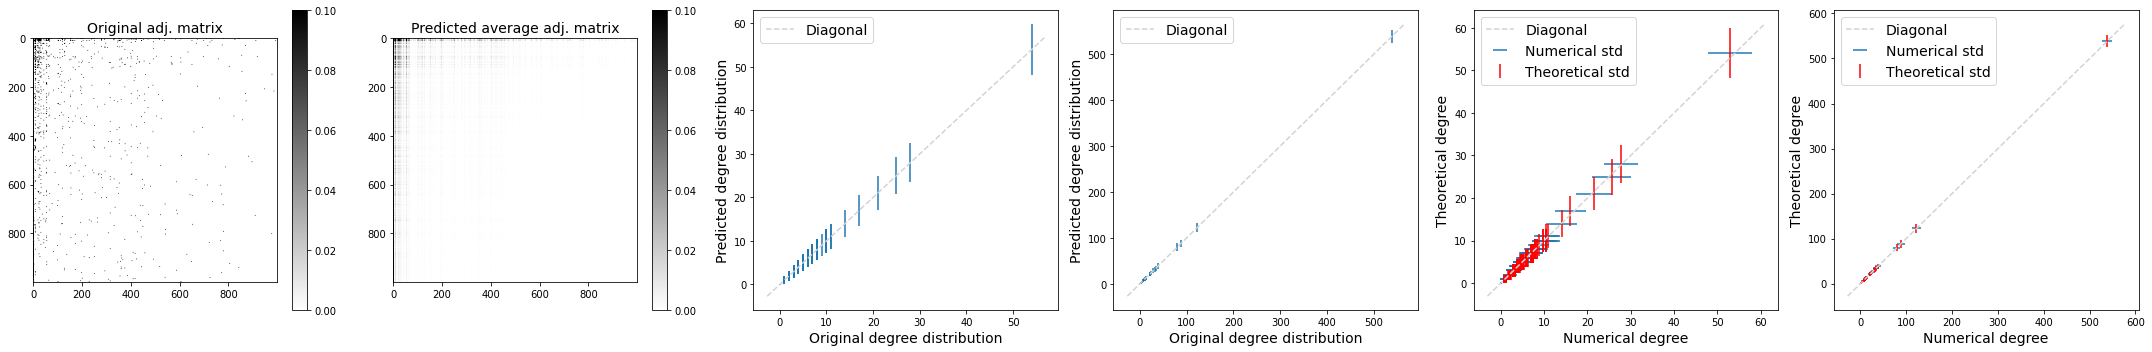

In [13]:
plt.figure(figsize=[30,5])
plt.subplot(1,6,1)
plot_adj(gn_adj, vmax=0.1)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,6,2)
plot_adj(m.adj_matrix, vmax=0.1)
plt.title('Predicted average adj. matrix',fontsize=14)
plt.subplot(1,6,3)
plt.errorbar(dout, theo_dout_mean,yerr=theo_dout_std, linestyle='None')
plt.xlabel('Original degree distribution',fontsize=14)
plt.ylabel('Predicted degree distribution',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,4)
plt.errorbar(din, theo_din_mean,yerr=theo_din_std, linestyle='None')
plt.xlabel('Original degree distribution',fontsize=14)
plt.ylabel('Predicted degree distribution',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,5)
plt.errorbar(num_dout_mean,theo_dout_mean,xerr=num_dout_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_dout_mean,theo_dout_mean,yerr=theo_dout_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,6)
plt.errorbar(num_din_mean,theo_din_mean,xerr=num_din_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_din_mean,theo_din_mean,yerr=theo_din_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.tight_layout()

# Bipartite networks

In [19]:
m = cl.BipartiteGraphEnsemble(1000,400)
m.fit([const.BipartiteOutDegreeSequence(bp_dout),const.BipartiteInDegreeSequence(bp_din)], opt_kwargs={'nit':100,'fatol':1e-2,'disp':True})

0:  |F(x)| = 26.5637; step 0.103801
1:  |F(x)| = 33.1316; step 1
2:  |F(x)| = 29.9832; step 1
3:  |F(x)| = 6.03659; step 1
4:  |F(x)| = 6.06286; step 1
5:  |F(x)| = 1.71445; step 1
6:  |F(x)| = 1.29407; step 1
7:  |F(x)| = 0.853042; step 1
8:  |F(x)| = 0.322515; step 1
9:  |F(x)| = 0.0759103; step 1
10:  |F(x)| = 0.0506729; step 1
11:  |F(x)| = 0.0542133; step 1
12:  |F(x)| = 0.0249881; step 1
13:  |F(x)| = 0.00353615; step 1
14:  |F(x)| = 0.0073262; step 1
15:  |F(x)| = 0.00320021; step 1
16:  |F(x)| = 0.00126322; step 1
17:  |F(x)| = 0.000451363; step 1
18:  |F(x)| = 0.000626907; step 1
19:  |F(x)| = 0.000433264; step 1
20:  |F(x)| = 0.000149243; step 1
21:  |F(x)| = 5.98528e-05; step 1
22:  |F(x)| = 6.40881e-05; step 1
23:  |F(x)| = 3.71089e-05; step 1
24:  |F(x)| = 7.25185e-06; step 1
25:  |F(x)| = 4.74164e-06; step 0.339911
26:  |F(x)| = 6.84706e-06; step 1
27:  |F(x)| = 4.55995e-06; step 1
28:  |F(x)| = 2.11118e-06; step 1
29:  |F(x)| = 1.05601e-06; step 1
30:  |F(x)| = 8.54938e-

In [22]:
o_out = obs.OutDegreeSequence
smpl = np.asarray([m.sample().sum(axis=1) for i in trange(100)])
theo_dout_mean = m.predict_mean(o_out)
theo_dout_std = m.predict_std(o_out)
num_dout_mean = smpl.mean(axis=0)
num_dout_std = smpl.std(axis=0)

o_in = obs.InDegreeSequence
smpl = np.asarray([m.sample().sum(axis=0) for i in trange(100)])
theo_din_mean = m.predict_mean(o_in)
theo_din_std = m.predict_std(o_in)
num_din_mean = smpl.mean(axis=0)
num_din_std = smpl.std(axis=0)

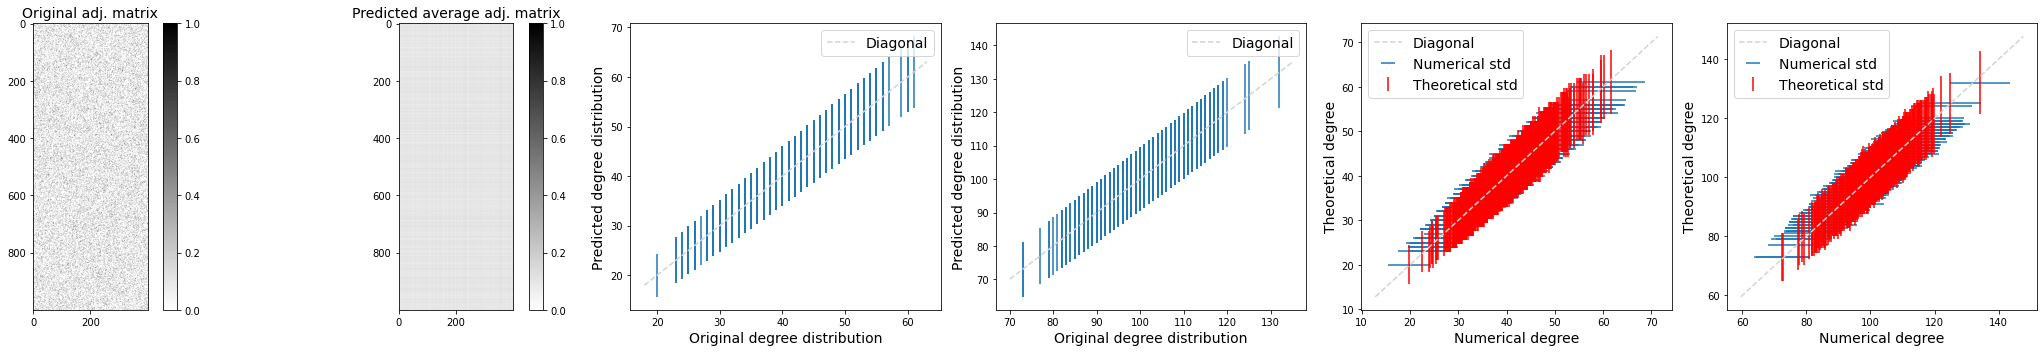

In [34]:
plt.figure(figsize=[30,5])
plt.subplot(1,6,1)
plot_adj(bp_adj)
plt.title('Original adj. matrix',fontsize=14)
plt.subplot(1,6,2)
plot_adj(m.adj_matrix)
plt.title('Predicted average adj. matrix',fontsize=14)
plt.subplot(1,6,3)
plt.errorbar(bp_dout, theo_dout_mean,yerr=theo_dout_std, linestyle='None')
plt.xlabel('Original degree distribution',fontsize=14)
plt.ylabel('Predicted degree distribution',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,4)
plt.errorbar(bp_din, theo_din_mean,yerr=theo_din_std, linestyle='None')
plt.xlabel('Original degree distribution',fontsize=14)
plt.ylabel('Predicted degree distribution',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,5)
plt.errorbar(num_dout_mean,theo_dout_mean,xerr=num_dout_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_dout_mean,theo_dout_mean,yerr=theo_dout_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.subplot(1,6,6)
plt.errorbar(num_din_mean,theo_din_mean,xerr=num_din_std,linestyle = 'None',label='Numerical std')
plt.errorbar(num_din_mean,theo_din_mean,yerr=theo_din_std,linestyle = 'None',color='red',label='Theoretical std')
plt.xlabel('Numerical degree',fontsize=14)
plt.ylabel('Theoretical degree',fontsize=14)
plt.plot(plt.xlim(),plt.xlim(),'--',color='lightgray',label='Diagonal')
plt.legend(fontsize=14)
plt.tight_layout()

# Observables

### RWR

In [117]:
x = np.zeros(N)
x[np.random.randint(0,N, int(N/100*20))] = 1
#x = np.random.rand(N)
x= x/x.sum()
x = np.asarray(x)
lambd = 0.3

In [118]:
def propagate(adj,x,lambd):
    p = adj / np.reshape(adj.sum(axis=0), [adj.shape[0],1])
    I = np.eye(p.shape[0])
    return lambd*x.dot(np.linalg.inv(I - (1-lambd)*p))

In [119]:
m = cl.GraphEnsemble(1000)
m.fit([const.DegreeSequence(d),const.Connectivity(250, nodeset1=np.arange(30), nodeset2=np.arange(40,50))], opt_kwargs={'nit':50,'fatol':1e-2,'disp':True})

0:  |F(x)| = 215.29; step 1
1:  |F(x)| = 180.475; step 1
2:  |F(x)| = 74.6861; step 1
3:  |F(x)| = 64.4829; step 1
4:  |F(x)| = 26.6388; step 1
5:  |F(x)| = 10.9457; step 1
6:  |F(x)| = 10.2879; step 1
7:  |F(x)| = 4.86518; step 1
8:  |F(x)| = 3.87894; step 1
9:  |F(x)| = 3.1111; step 1
10:  |F(x)| = 2.36211; step 1
11:  |F(x)| = 1.92251; step 1
12:  |F(x)| = 1.37895; step 1
13:  |F(x)| = 0.961405; step 1
14:  |F(x)| = 0.705619; step 1
15:  |F(x)| = 0.481579; step 1
16:  |F(x)| = 0.269148; step 1
17:  |F(x)| = 0.094001; step 1
18:  |F(x)| = 0.036836; step 1
19:  |F(x)| = 0.0347398; step 1
20:  |F(x)| = 0.0234311; step 1
21:  |F(x)| = 0.0154952; step 1
22:  |F(x)| = 0.0141152; step 1
23:  |F(x)| = 0.0137432; step 1
24:  |F(x)| = 0.0116325; step 1
25:  |F(x)| = 0.00958781; step 1
26:  |F(x)| = 0.00764707; step 1
27:  |F(x)| = 0.00537208; step 1
28:  |F(x)| = 0.00318602; step 1
29:  |F(x)| = 0.00173046; step 1
30:  |F(x)| = 0.000936165; step 1
31:  |F(x)| = 0.000718378; step 1
32:  |F(x)|

In [121]:
k = obs.RandomWalkWithRestart.eval_transfer_matrix(ba_adj, lambd)
kge = obs.RandomWalkWithRestart.eval_transfer_matrix(m.adj_matrix, lambd)

In [123]:
o = obs.RandomWalkWithRestart(x, lambd, mode='exact')
theo_mean = m.predict_mean(o)
theo_std = m.predict_std(o)
y = propagate(ba_adj, x, lambd) # RWR scores on original network
theo_z = m.predict_zscore(y, o)

In [126]:
N_samples = 100
rdmy_ms = np.zeros([len(ba),N_samples])
for i in trange(N_samples):
    flag = False
    while not flag:
        smpl = m.sample()
        prop = propagate(smpl,x,lambd)
        if np.isnan(propagate(smpl,x,lambd)).sum() == 0:
            rdmy_ms[:,i] = propagate(smpl, x,lambd)
            flag = True
    
num_z = (y - rdmy_ms.mean(axis=1))/rdmy_ms.std(axis=1)

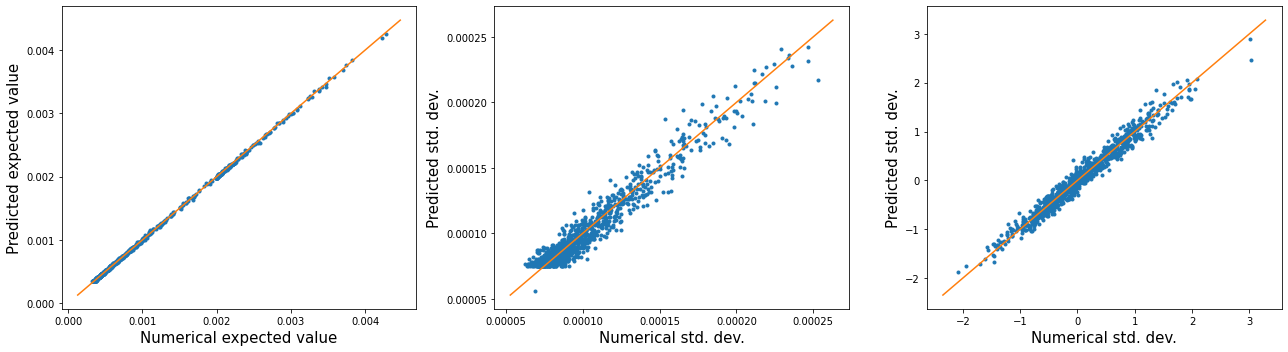

In [129]:
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.plot(rdmy_ms.mean(axis=1),theo_mean,'.')
plt.xlabel('Numerical expected value',fontsize=15)
plt.ylabel('Predicted expected value',fontsize=15)
plt.plot(plt.xlim(),plt.xlim())
plt.subplot(132)
plt.plot(rdmy_ms.std(axis=1),theo_std,'.')
plt.xlabel('Numerical std. dev.',fontsize=15)
plt.ylabel('Predicted std. dev.',fontsize=15)
plt.plot(plt.xlim(),plt.xlim())
plt.subplot(133)
plt.plot(num_z,theo_z,'.')
plt.xlabel('Numerical std. dev.',fontsize=15)
plt.ylabel('Predicted std. dev.',fontsize=15)
plt.plot(plt.xlim(),plt.xlim())
plt.tight_layout()

### ANND

In [415]:
mu = m.predict_mean(obs.AverageNeighborDegree.func)

In [416]:
sigma = [m.predict_std(grad(obs.AverageNeighborDegree.func, argnums=0), f_args=[i]) for i in trange(N)]

In [417]:
annd = obs.AverageNeighborDegree.func
N_samples = 100
y = np.asarray(annd(csc_matrix(adj))).flatten()
#samples = []
rdm_annd = np.zeros([N,N_samples])
for i in trange(N_samples):
    smpl = csc_matrix(m.sample())
    prop = np.asarray(annd(smpl)).flatten()
    rdm_annd[:,i] = prop
    
z = (y - rdm_annd.mean(axis=1))/rdm_annd.std(axis=1)

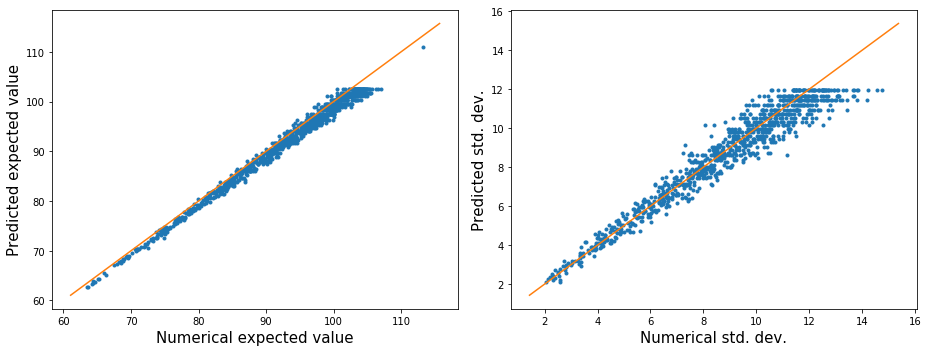

In [418]:
plt.figure(figsize=[13,5])
plt.subplot(121)
plt.plot(rdm_annd.mean(axis=1),mu,'.')
plt.xlabel('Numerical expected value',fontsize=15)
plt.ylabel('Predicted expected value',fontsize=15)
plt.plot(plt.xlim(),plt.xlim())
plt.subplot(122)
plt.plot(rdm_annd.std(axis=1),sigma,'.')
plt.xlabel('Numerical std. dev.',fontsize=15)
plt.ylabel('Predicted std. dev.',fontsize=15)
plt.plot(plt.xlim(),plt.xlim())
plt.tight_layout()

# Save and load ensemble

In [ ]:
cl.save_ensemble(m,'')

In [ ]:
m = cl.load_ensemble('')